<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/%EC%BD%94%EB%94%A9%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%97%B0%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#멀쩡한 사각형

def solution(w,h):
    #정사각일때
    if w==h:return w*h-h
        
    l,s = max(w,h), min(w,h)
    #직사각일때 홀수?짝수?공약수,제곱근 어떤 간단한 규칙이 있나요?
    # return w*h-(l+s-1)

    #아래는 실제 이지만 시간이 걸린다
    dots=[]#set()
    g=s/l
    y,yi=0,0
    for x in range(1,l): #레인지를 줄여볼까?
        y=g*x #s/l*x #기울기 26>22 4초 단축
        yi=s*x//l #정수로 내림 int()보다 빠름
        if y > yi:
            if (x-1,yi) not in dots: dots.append((x-1,yi))
            if (x,yi) not in dots: dots.append((x,yi))
            # dots.update([(x-1,yi),(x,yi)])
            
    print(l,s,':',len(dots),'=>',l*s-len(dots),'=',l*s,'-',len(dots))
    return w*h-len(dots)

import time
start=time.time(); print(solution(8,12))

n=100; print(solution(n,n-1))

# n=4**2;for i in range(n-1,0,-1): (solution(n,i))
# n=7**2;for i in range(n-1,0,-1): (solution(n,i))

print('time :', time.time() -start)


12 8 : 16 => 80 = 96 - 16
80
100 99 : 198 => 9702 = 9900 - 198
9702
time : 0.005555868148803711


In [38]:
#하루 종일 고생해서 스스로 찾은 해답

from math import gcd

#잘린 멀쩡하지 않은 것 구하는 
def mysol(m,n):
    g=gcd(m,n)
    if(g>1):
        return mysol(m//g,n//g) * g ###아래 코드를 보니  mysol은 결국 한번반 재귀 호출한다 왜? gcd는 한번만 구하먼 되니까
    return m+n-1 ###한번 재귀 호출되면 식은 (m//g + n//g -1 ) * g 와 같다.

def solution(m,n):
    #전체에서 멀쩡하지 않은것 빼기
    return m*n-mysol(m,n)

'''프로그래머스 다른이의 코드
from math import gcd
def solution(w,h):
    return w * h - (w/gcd(w, h) + h/gcd(w, h) - 1) * gcd(w, h)
'''

import time
start=time.time()
n=100000000
print(solution(n,n-1))
print('time :', time.time() -start)

n=3#12**2
for i in range(n-1,0,-1):
    dots=(mysol(n,i))
    print(n,i,':',dots,'=>',n*i-(dots),'=',n*i,'-',(dots))


9999999700000002
time : 0.0002002716064453125
3 2 : 4 => 2 = 6 - 4
3 1 : 3 => 0 = 3 - 3


1.0
0.8333333333333334
0.6666666666666666
0.5
0.3333333333333333
0.16666666666666666


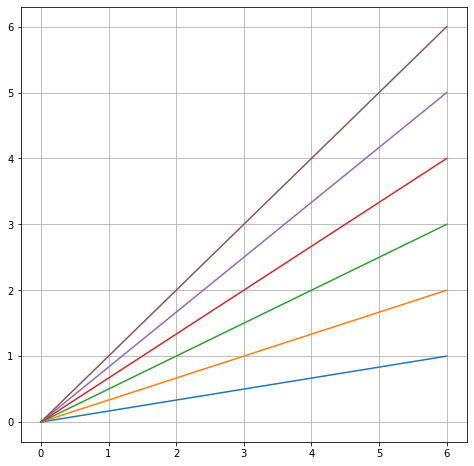

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))

n=6
for i in range(1,n+1):
    plt.plot([0,n],[0,i])
    print((n-i+1)/n)
# sns.lineplot([1,2,3,4,5],[1,2,3,4,5])
plt.grid()
plt.show()

In [ ]:
'''
찾은 과정 : 도표를 그리고 처음엔 직접 세어보기도 하면서
처음 만든 반복문으로 도트 수를 세어보고
몇 가지 예를 출력해보고
도트 수 세는 공식을 찾아 냄
'''
# 12 12 : 12 => 132 = 144 - 12    1*1 의 *12 == 6x6*2 > 3x3*2*2 = 12
# 12 11 : 22 => 110 = 132 - 22    23-1
# 12 10 : 20 => 100 = 120 - 20	6*5 잘린것 *2 > 6x5*2 > 10*2 >20

# 12 9 : 18 => 90 = 108 - 18		4*3 > 6의 *3 > 홀수 규칙은 서로 소일때?????????????????

# 12 8 : 16 => 80 = 96 - 16 	6x4*2 > 3x2*2*2>4*2*2 >16
# 12 7 : 18 => 66 = 84 - 18 	19-1
# 12 6 : 12 => 60 = 72 - 12	6x3*2 > 3x1*2*2 > 12
# 12 5 : 16 => 44 = 60 - 16	17-1
# 12 4 : 12 => 36 = 48 - 12  3*1 의 *2*2

# 12 3 : 12 => 24 = 36 - 12  4*1 의 * 3 

# 12 2 : 12 => 12 = 24 - 12  6*1 의 * 2
# 12 1 : 12 => 0 = 12 - 12   12*1 / 홀수규칙은 13-1


# 16 16							1*1의 16배
# 16 15 : 30 => 210 = 240 - 30 : 31-1
# 16 14 : 28 => 196 = 224 - 28 : 8x7 *2 > 14*2 = 28
# 16 13 : 28 => 180 = 208 - 28 (29-1)
# 16 12 : 24 => 168 = 192 - 24 짝수규칙 (4x3> 6 *2)*2 = 24
# 16 11 : 26 => 150 = 176 - 26 (27-1)
# 16 10 : 24 => 136 = 160 - 24 (짝,짝) 8x5 > 12 *2 = 24
# 16 9 : 24 => 120 = 144 - 24 :25-1
# 16 8 : 16 => 112 = 128 - 16  8x4*2 > 4x2*2*2 > 2x1*2*2*2 > 16
# 16 7 : 22 => 90 = 112 - 22 :23-1
# 16 6 : 20 => 76 = 96 - 20 : 8*3의 2배 >(21-1)*2 = 20
# 16 5 : 20 => 60 = 80 - 20 : 21-1 
# 16 4 : 16 => 48 = 64 - 16 : 8x2*2> 4*2*2 > 16
# 16 3 : 18 => 30 = 48 - 18	: 19-1 > 뒤집어서 홀수규칙으로 계산? (max+min-(1+(max**0.5 -1 if min%(max**0.5)==0 else 0))
# 16 2 : 16 => 16 = 32 - 16	8*1 의 2배
# 16 1 : 16 => 0 = 16 - 16  	:16

# 알고리즘
# 장단으로 구분
# 모두 짝수이면 2로 나누고 재귀호출
# 2로 나누어지지 않으면 홀수규칙 적용 -> 한쪽이 홀수가 되었 음

# >> 3으로도 나눠지고 ,5, 7, 11 ,13 
# 즉 최대 약수를 구해야 한다.
# 결국은 최대 공약수가 1일 될 때까 공약수로 나눈 몫을 
# 반복해서

# 멀쩡하지 않은 것 >컴퓨터 화면에서 그려질 라인의 도트수 찾기

# 홀수 규칙은 m+n-1

# 최종 정답 : 라인 없는 토트수 > 멀쩡한 사각형
# max*min - (m+n-1)*gcb(m,n)

# 완성판
# 멀쩡하지 않은 것 구하기
# 최대 공배수를 구한다
# 몫으로 재귀호출
# 최대 공배수가 1이면 홀수 법칙으로 구한다것

# 49 48 : 96 => 2256 = 2352 - 96
# 49 47 : 95 => 2208 = 2303 - 95
# 49 46 : 94 => 2160 = 2254 - 94
# 49 45 : 93 => 2112 = 2205 - 93
# 49 44 : 92 => 2064 = 2156 - 92
# 49 43 : 91 => 2016 = 2107 - 91

# 49 42 : 84 => 1974 = 2058 - 84
# 49 41 : 89 => 1920 = 2009 - 89
# 49 40 : 88 => 1872 = 1960 - 88
# 49 39 : 87 => 1824 = 1911 - 87
# 49 38 : 86 => 1776 = 1862 - 86
# 49 37 : 85 => 1728 = 1813 - 85
# 49 36 : 84 => 1680 = 1764 - 84

# 49 35 : 77 => 1638 = 1715 - 77
# 49 34 : 82 => 1584 = 1666 - 82
# 49 33 : 81 => 1536 = 1617 - 81
# 49 32 : 80 => 1488 = 1568 - 80
# 49 31 : 79 => 1440 = 1519 - 79
# 49 30 : 78 => 1392 = 1470 - 78
# 49 29 : 77 => 1344 = 1421 - 77

# 49 28 : 70 => 1302 = 1372 - 70
# 49 27 : 75 => 1248 = 1323 - 75
# 49 26 : 74 => 1200 = 1274 - 74
# 49 25 : 73 => 1152 = 1225 - 73
# 49 24 : 72 => 1104 = 1176 - 72
# 49 23 : 71 => 1056 = 1127 - 71
# 49 22 : 70 => 1008 = 1078 - 70

# 49 21 : 63 => 966 = 1029 - 63

# 49 20 : 68 => 912 = 980 - 68
# 49 19 : 67 => 864 = 931 - 67
# 49 18 : 66 => 816 = 882 - 66
# 49 17 : 65 => 768 = 833 - 65
# 49 16 : 64 => 720 = 784 - 64
# 49 15 : 63 => 672 = 735 - 63

# 49 14 : 56 => 630 = 686 - 56 : 63 - 6

# 49 13 : 61 => 576 = 637 - 61
# 49 12 : 60 => 528 = 588 - 60
# 49 11 : 59 => 480 = 539 - 59
# 49 10 : 58 => 432 = 490 - 58
# 49 9 : 57 => 384 = 441 - 57
# 49 8 : 56 => 336 = 392 - 56

# 49 7 : 49 => 294 = 343 - 49 : 55 - 6

# 49 6 : 54 => 240 = 294 - 54
# 49 5 : 53 => 192 = 245 - 53
# 49 4 : 52 => 144 = 196 - 52
# 49 3 : 51 => 96 = 147 - 51
# 49 2 : 50 => 48 = 98 - 50

# 49 1 : 49 => 0 = 49 - 49

# 참고용 : 프로그래머스 다른이의 답

In [42]:
def gcd(a,b): return b if (a==0) else gcd(b%a,a)    #유클리드 호제법 최대 공약수 구하기
def solution(w,h): return w*h-w-h+gcd(w,h) 
#전체사각형에서 w, h 방향에서 각각 보이는 못쓰는 사각형을 뺀 후 중복으로 뺀 사각형을 더했네요.
#중복으로 뺀 것이..규칙이 있네요
import time
start=time.time()
n=100000000
print(solution(n,n-1))
print('time :', time.time() -start)

9999999700000002
time : 0.00024700164794921875
